# Lead Scoring Case Study

In [369]:
# Importing NumPy and Pandas

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [370]:
# Supressing the warnings

import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [371]:
leads = pd.read_csv("Leads.csv")

In [372]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [373]:
# Checking the dataset shape

leads.shape

(9240, 37)

In [374]:
# Checking different columns in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [375]:
# Checking the dataset summary

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [376]:
# Checking the dataset info

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 1 Data Cleaning and Preparation

In [377]:
# Checking for missing values

leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

We can see that there are many missing values.

As there are 9000 datapoints in the dataframe, we eliminate the columns having greater than 3000 missing values

In [378]:
# Dropping columns having greater than 3000 missing values

for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [379]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [380]:
#checking value counts for the "City" column

leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can see that Mumbai has the highest number of leads

Also, we can interpret that the "City" variable would not be of much use in analysis, hence dropping it.

In [381]:
# dropping the "City" variable

leads.drop(['City'], axis = 1, inplace = True)

In [382]:
# Checking value counts for "Country" column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

We can see that "India" has the highest number of leads

In [383]:
# Dropping the "Country" feature

leads.drop(['Country'], axis = 1, inplace = True)

In [384]:
#Checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [385]:
# Checking the number of null values again

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

# Visualizing the features with "Select" values

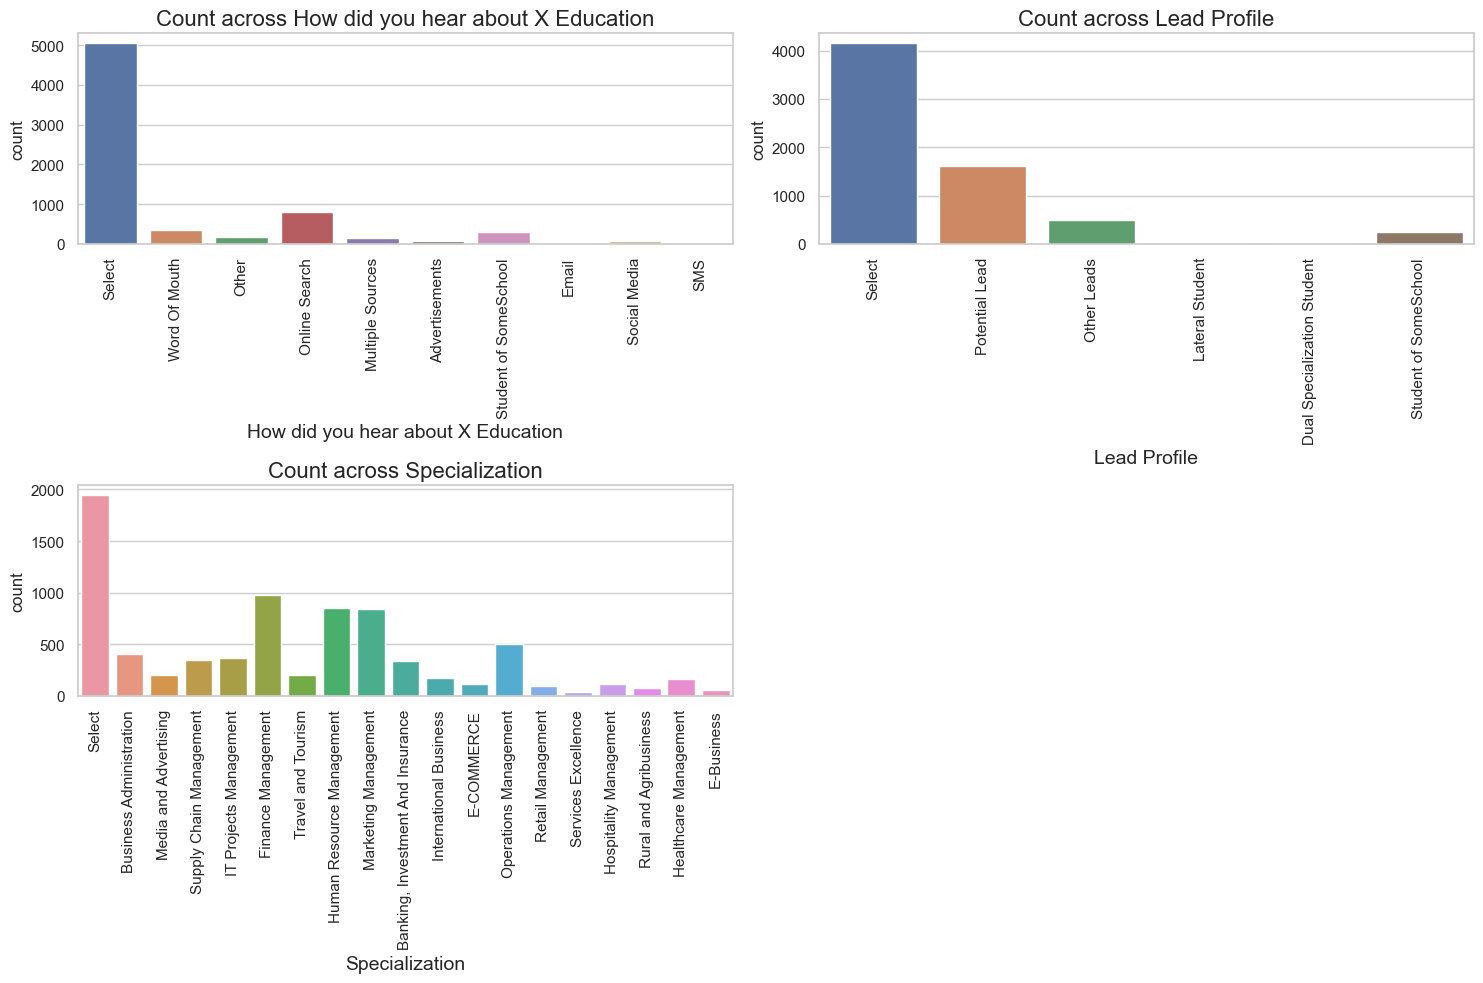

In [386]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

In [387]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

We see there are a few columns having a level "Select" which means that students have not selected the option for that particular column.

Thus, we need to identify the value counts of "Select" level in all the columns.

The below 3 columns have the level "Select" hence verifying them again

In [388]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [389]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [390]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

# Visualizing the features

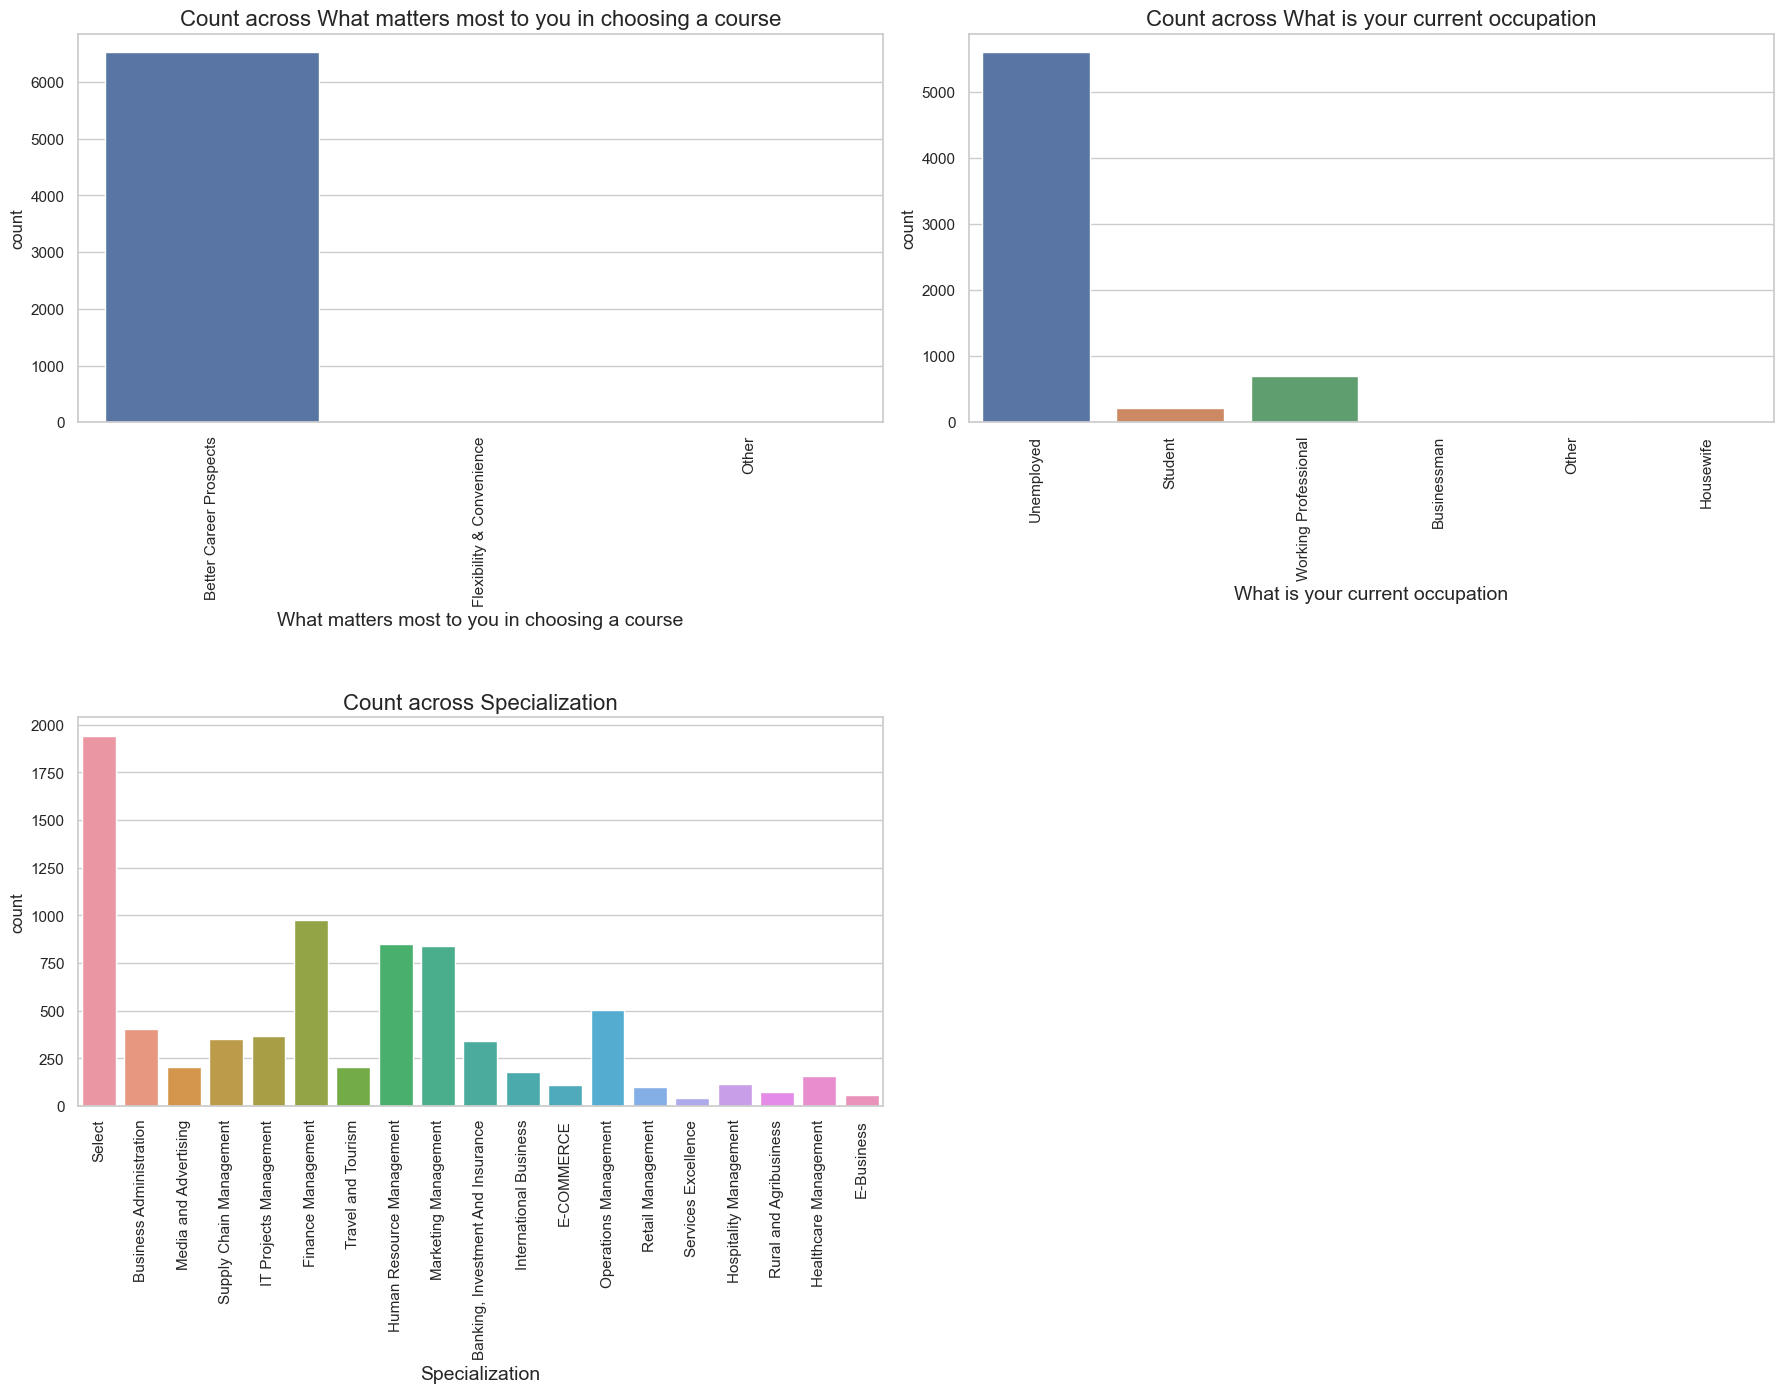

In [391]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('What matters most to you in choosing a course',1)
countplot('What is your current occupation',2)
countplot('Specialization',3)

plt.tight_layout()

It is evident that the "Lead Profile" and "How did you hear about Education" have many rows which have the value "Select" which would not be used in analysis.

Hence, we will drop these values.

In [392]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

We can see that there are some columns having only one value majorly present for all datapoints.

These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About our Courses, Update me on Supply Chain content, Get Updates on DM content, I agree to pay the amount through cheque.

As all of these values are No, we will drop these cloumns as they would not help in analysis.

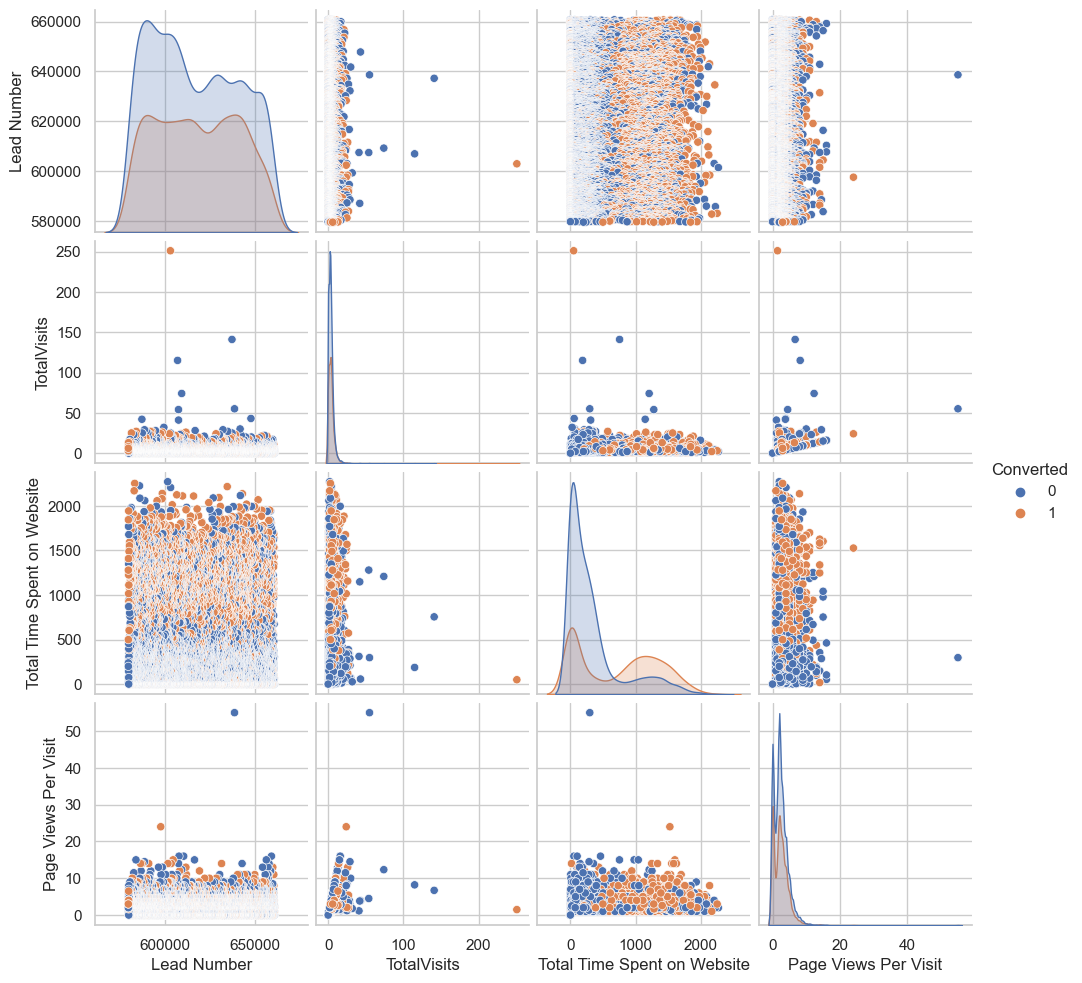

In [393]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

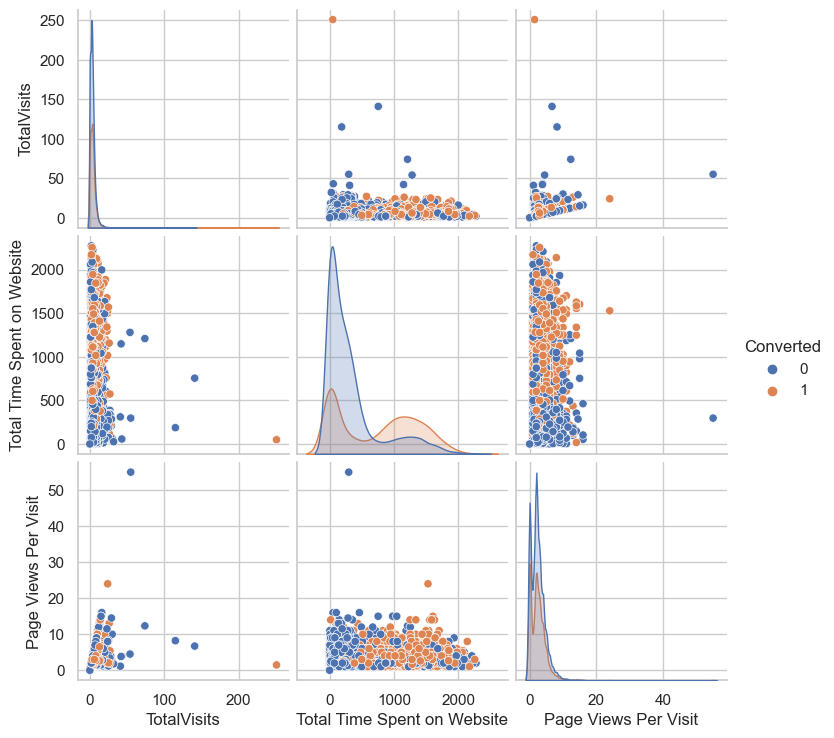

In [394]:
x_edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [395]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


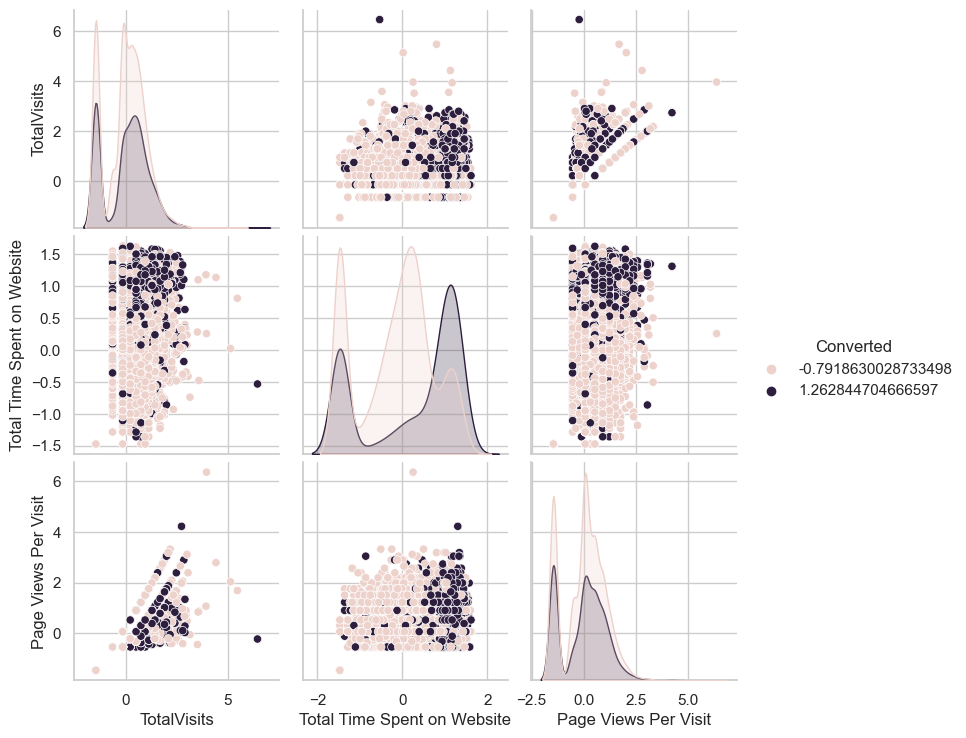

In [396]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()


Dropping the above columns

In [397]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [398]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Dropping the column "Better Career Prospectus" as it appears 6528 times

In [399]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [400]:
# Verifying null values again

leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [401]:
# We will drop null values in the column'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

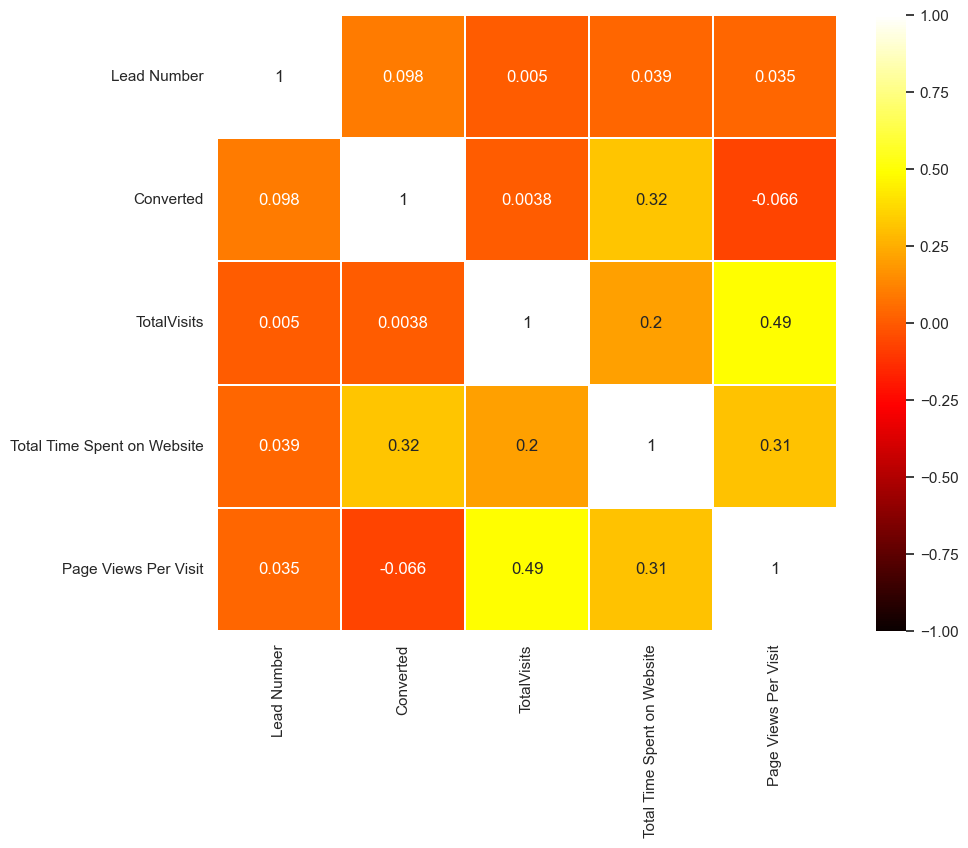

In [402]:
# Plotting a heatmap for observing correlation

plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), annot=True,cmap="hot", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

# Categorical Analysis

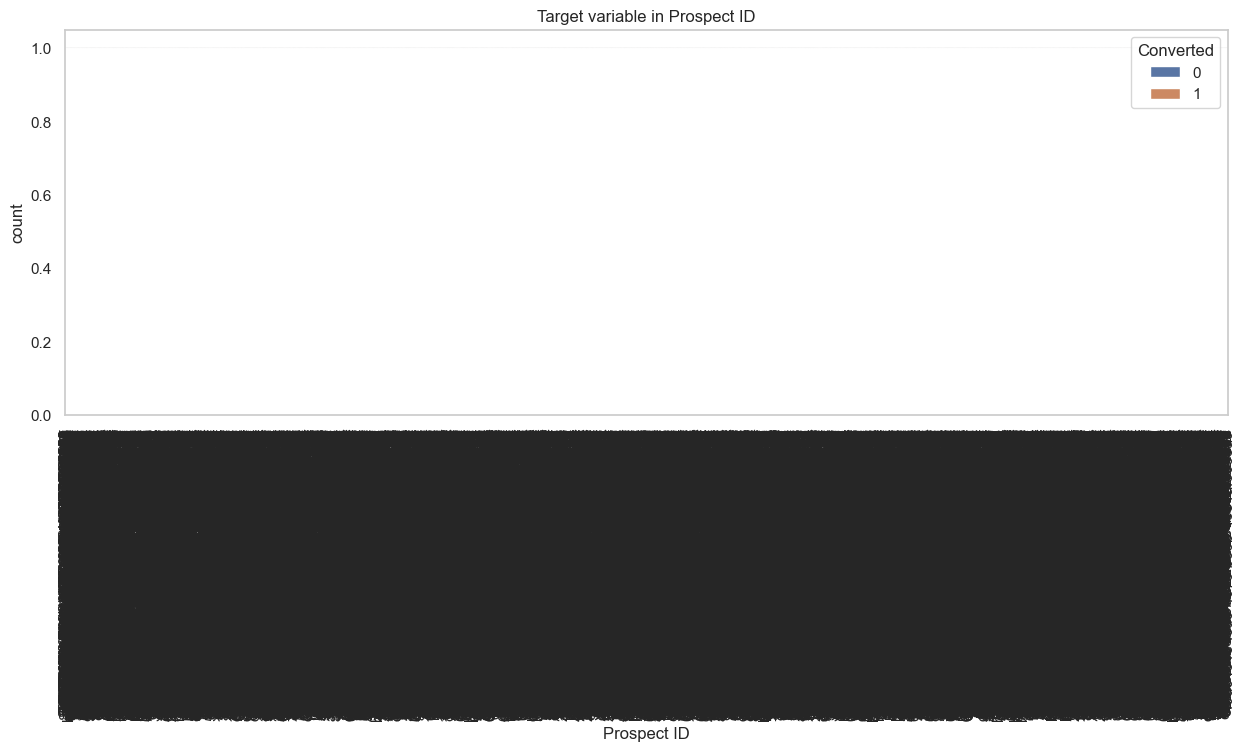

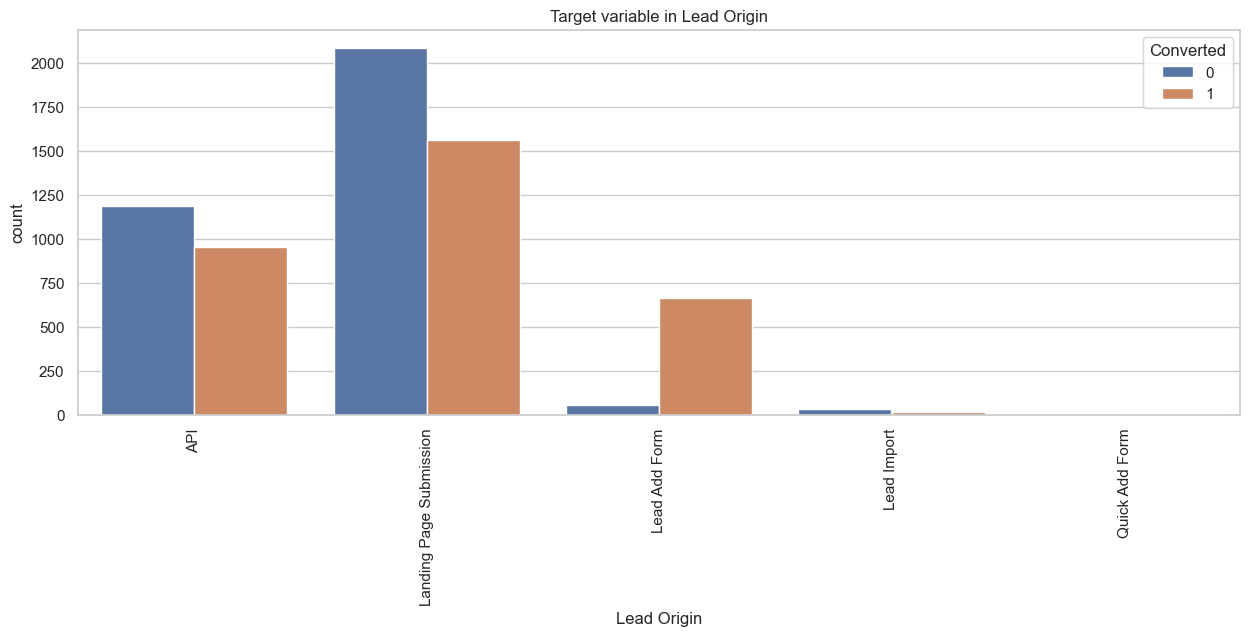

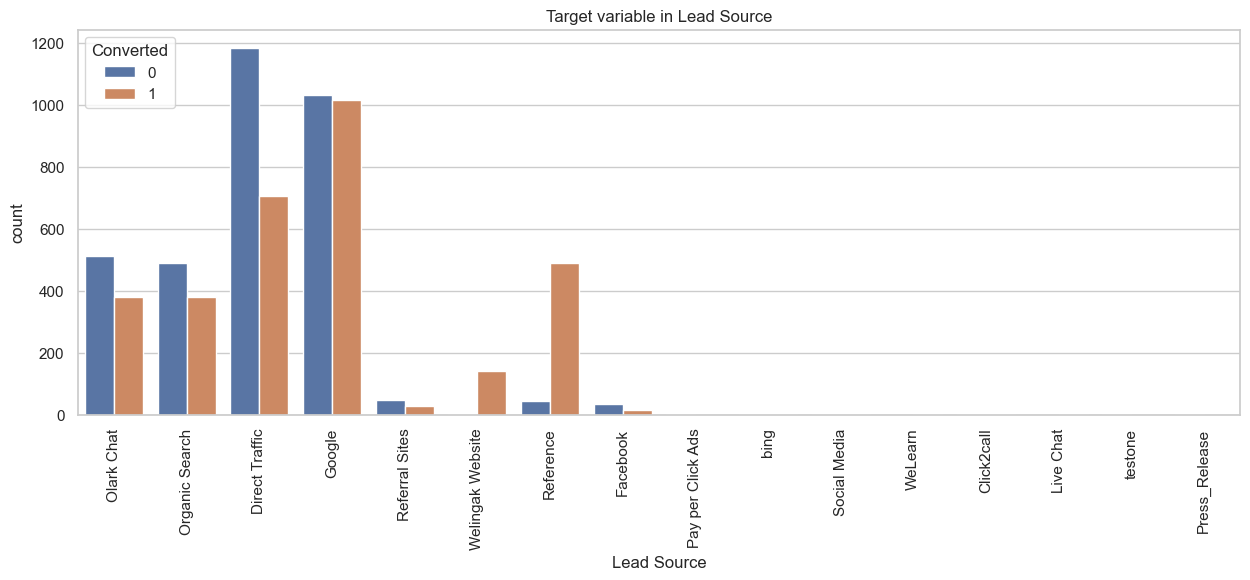

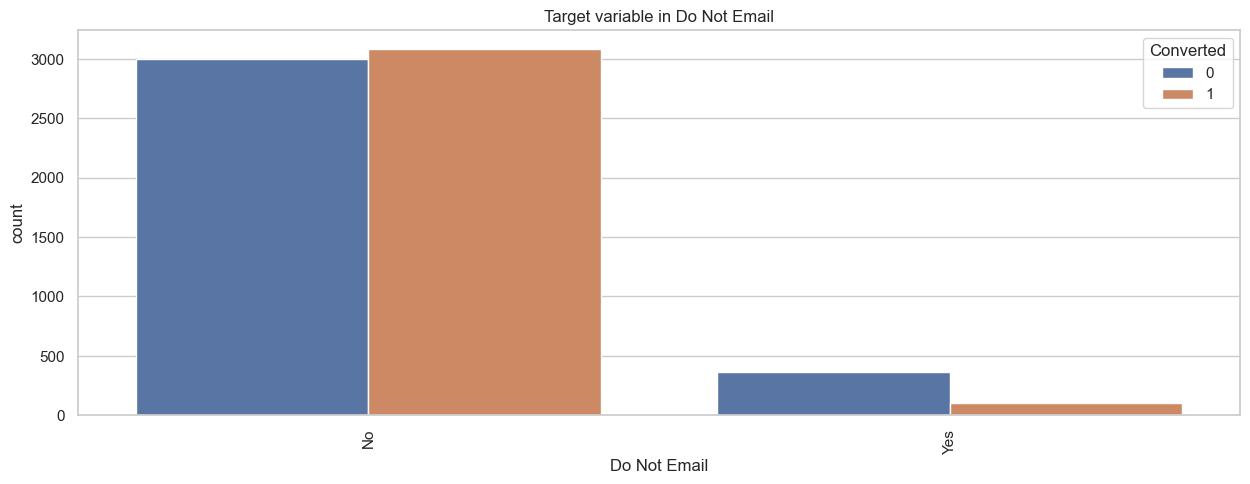

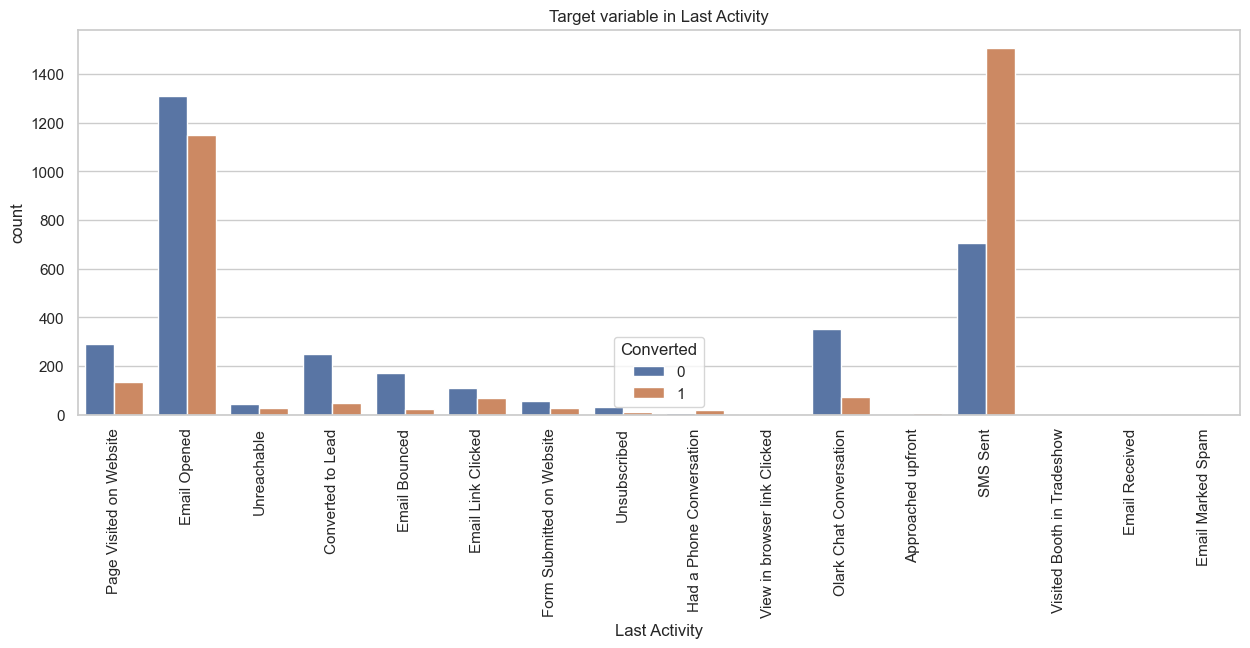

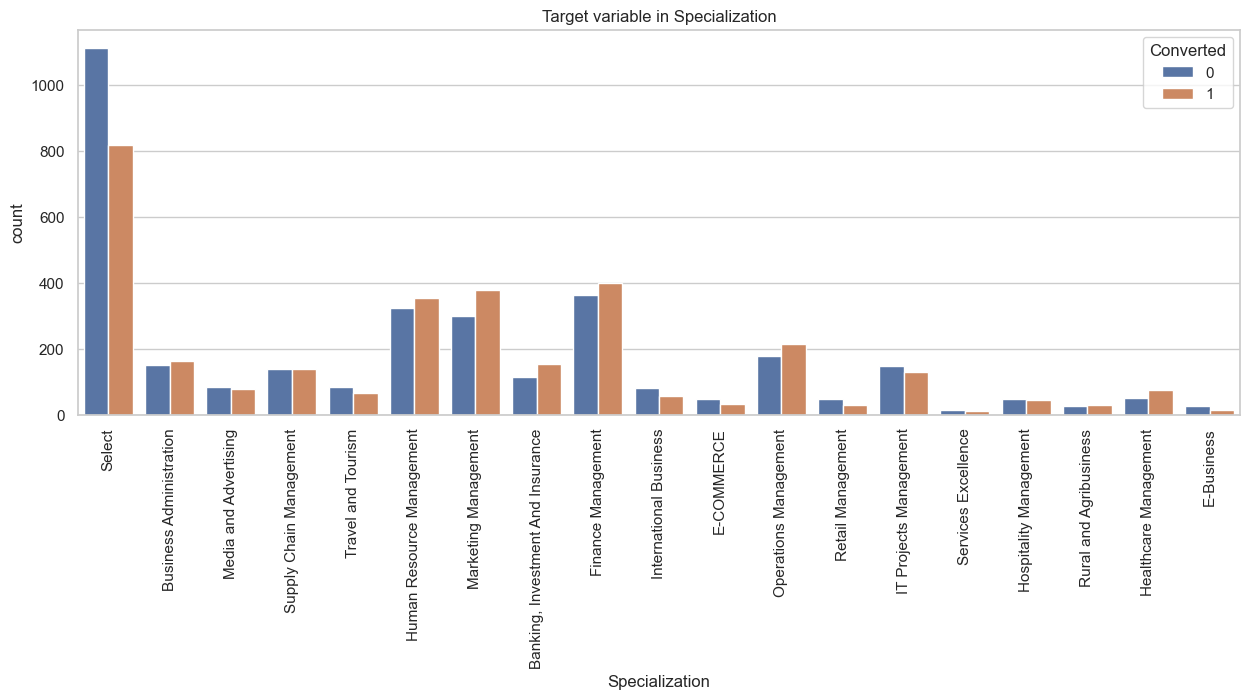

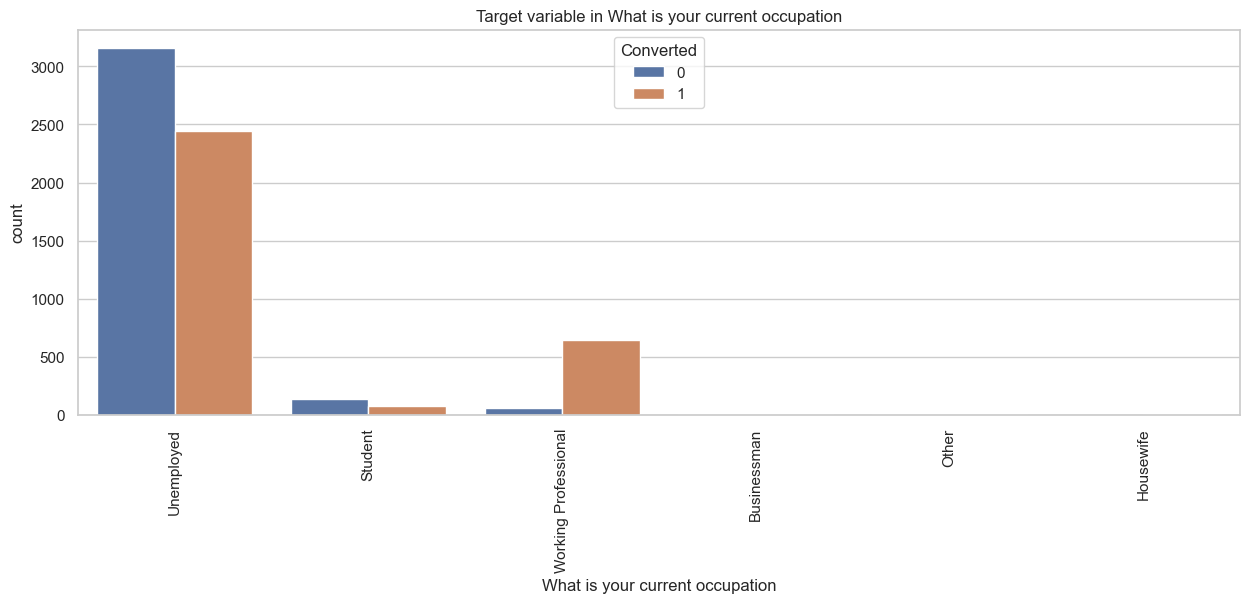

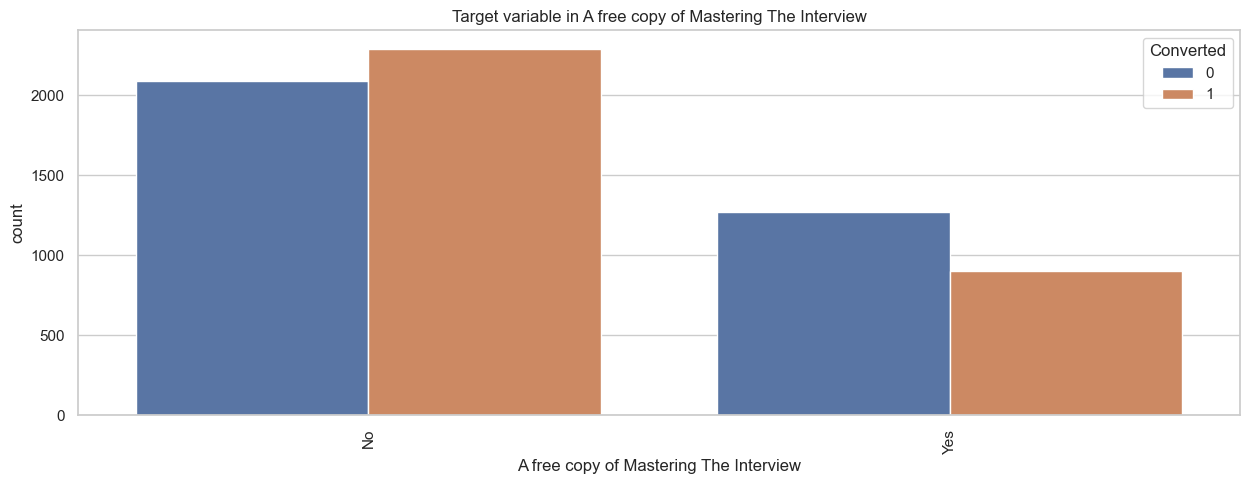

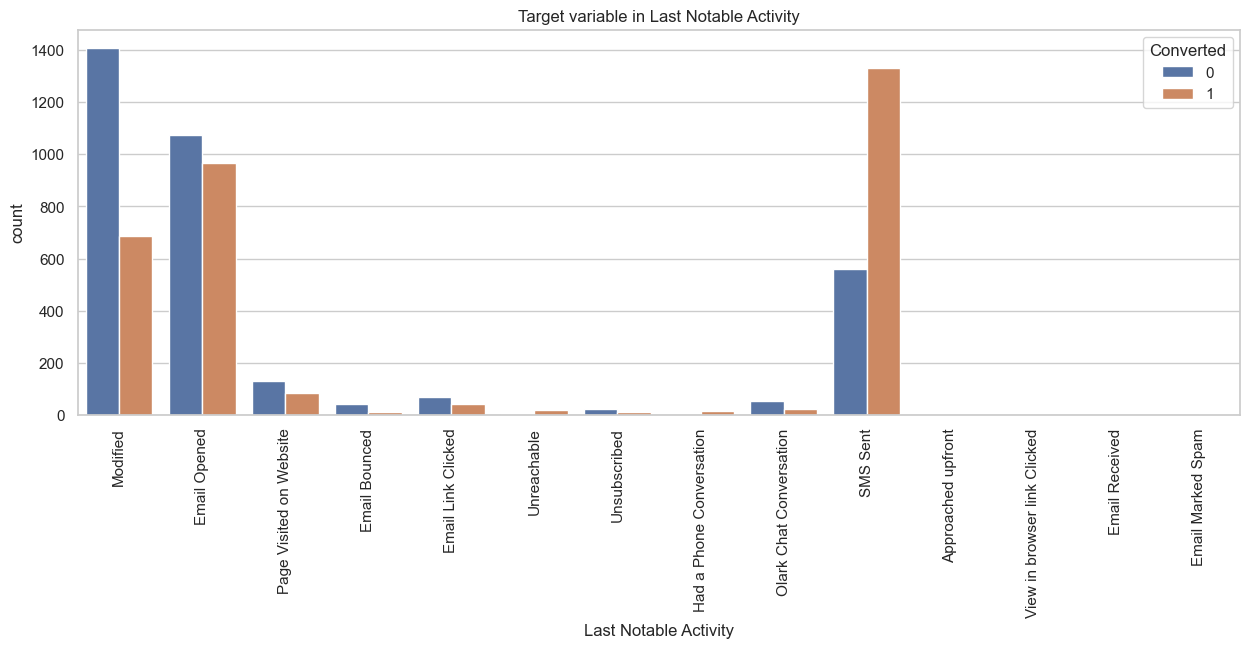

In [403]:
conv = leads.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(leads[i], hue=leads.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

In [404]:
# Checking for null values

leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [405]:
# Dropping null values in the column "Total Visits"

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [406]:
# Checking for null values

leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [407]:
# Dropping null values in the column "Specialization"

leads = leads[~pd.isnull(leads['Specialization'])]

In [408]:
# Checking for null values

leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                             0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

Thus, we see that now there are no values present in our data

In [409]:
# Checking the percentage of rows retained

print(len(leads.index))
print(len(leads.index)/9240)

6402
0.6928571428571428


In [410]:
# Viewing the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [411]:
# Dropping the "Prospect ID" and "Lead Number" 

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [412]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# Dummy Variable Creation

We will first check which variables are categorical

In [413]:
# Checking the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [414]:
# Demo Cell

df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [415]:
pd.get_dummies(df)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [416]:
pd.get_dummies(df, prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [417]:
# Creating dummy variable using the "get dummies" command

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [418]:
# Creating dummy variable seperately for "Specialization"

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [419]:
# Dropping the variables for which dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [515]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Test Train Split

In [421]:
# Putting all the feature variables in X

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [422]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [423]:
# Spillting the dataset into train 70% and test 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [424]:
# Checking the shape

print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4481, 74)
y_train Size (4481,)


# Scaling 

In [425]:
# Scaling 3 numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1747,0.007968,0.672535,0.036364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6936,0.007968,0.104754,0.036364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4533,0.007968,0.446303,0.036364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5879,0.019920,0.006162,0.090909,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1329,0.023904,0.346831,0.109091,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Correlations

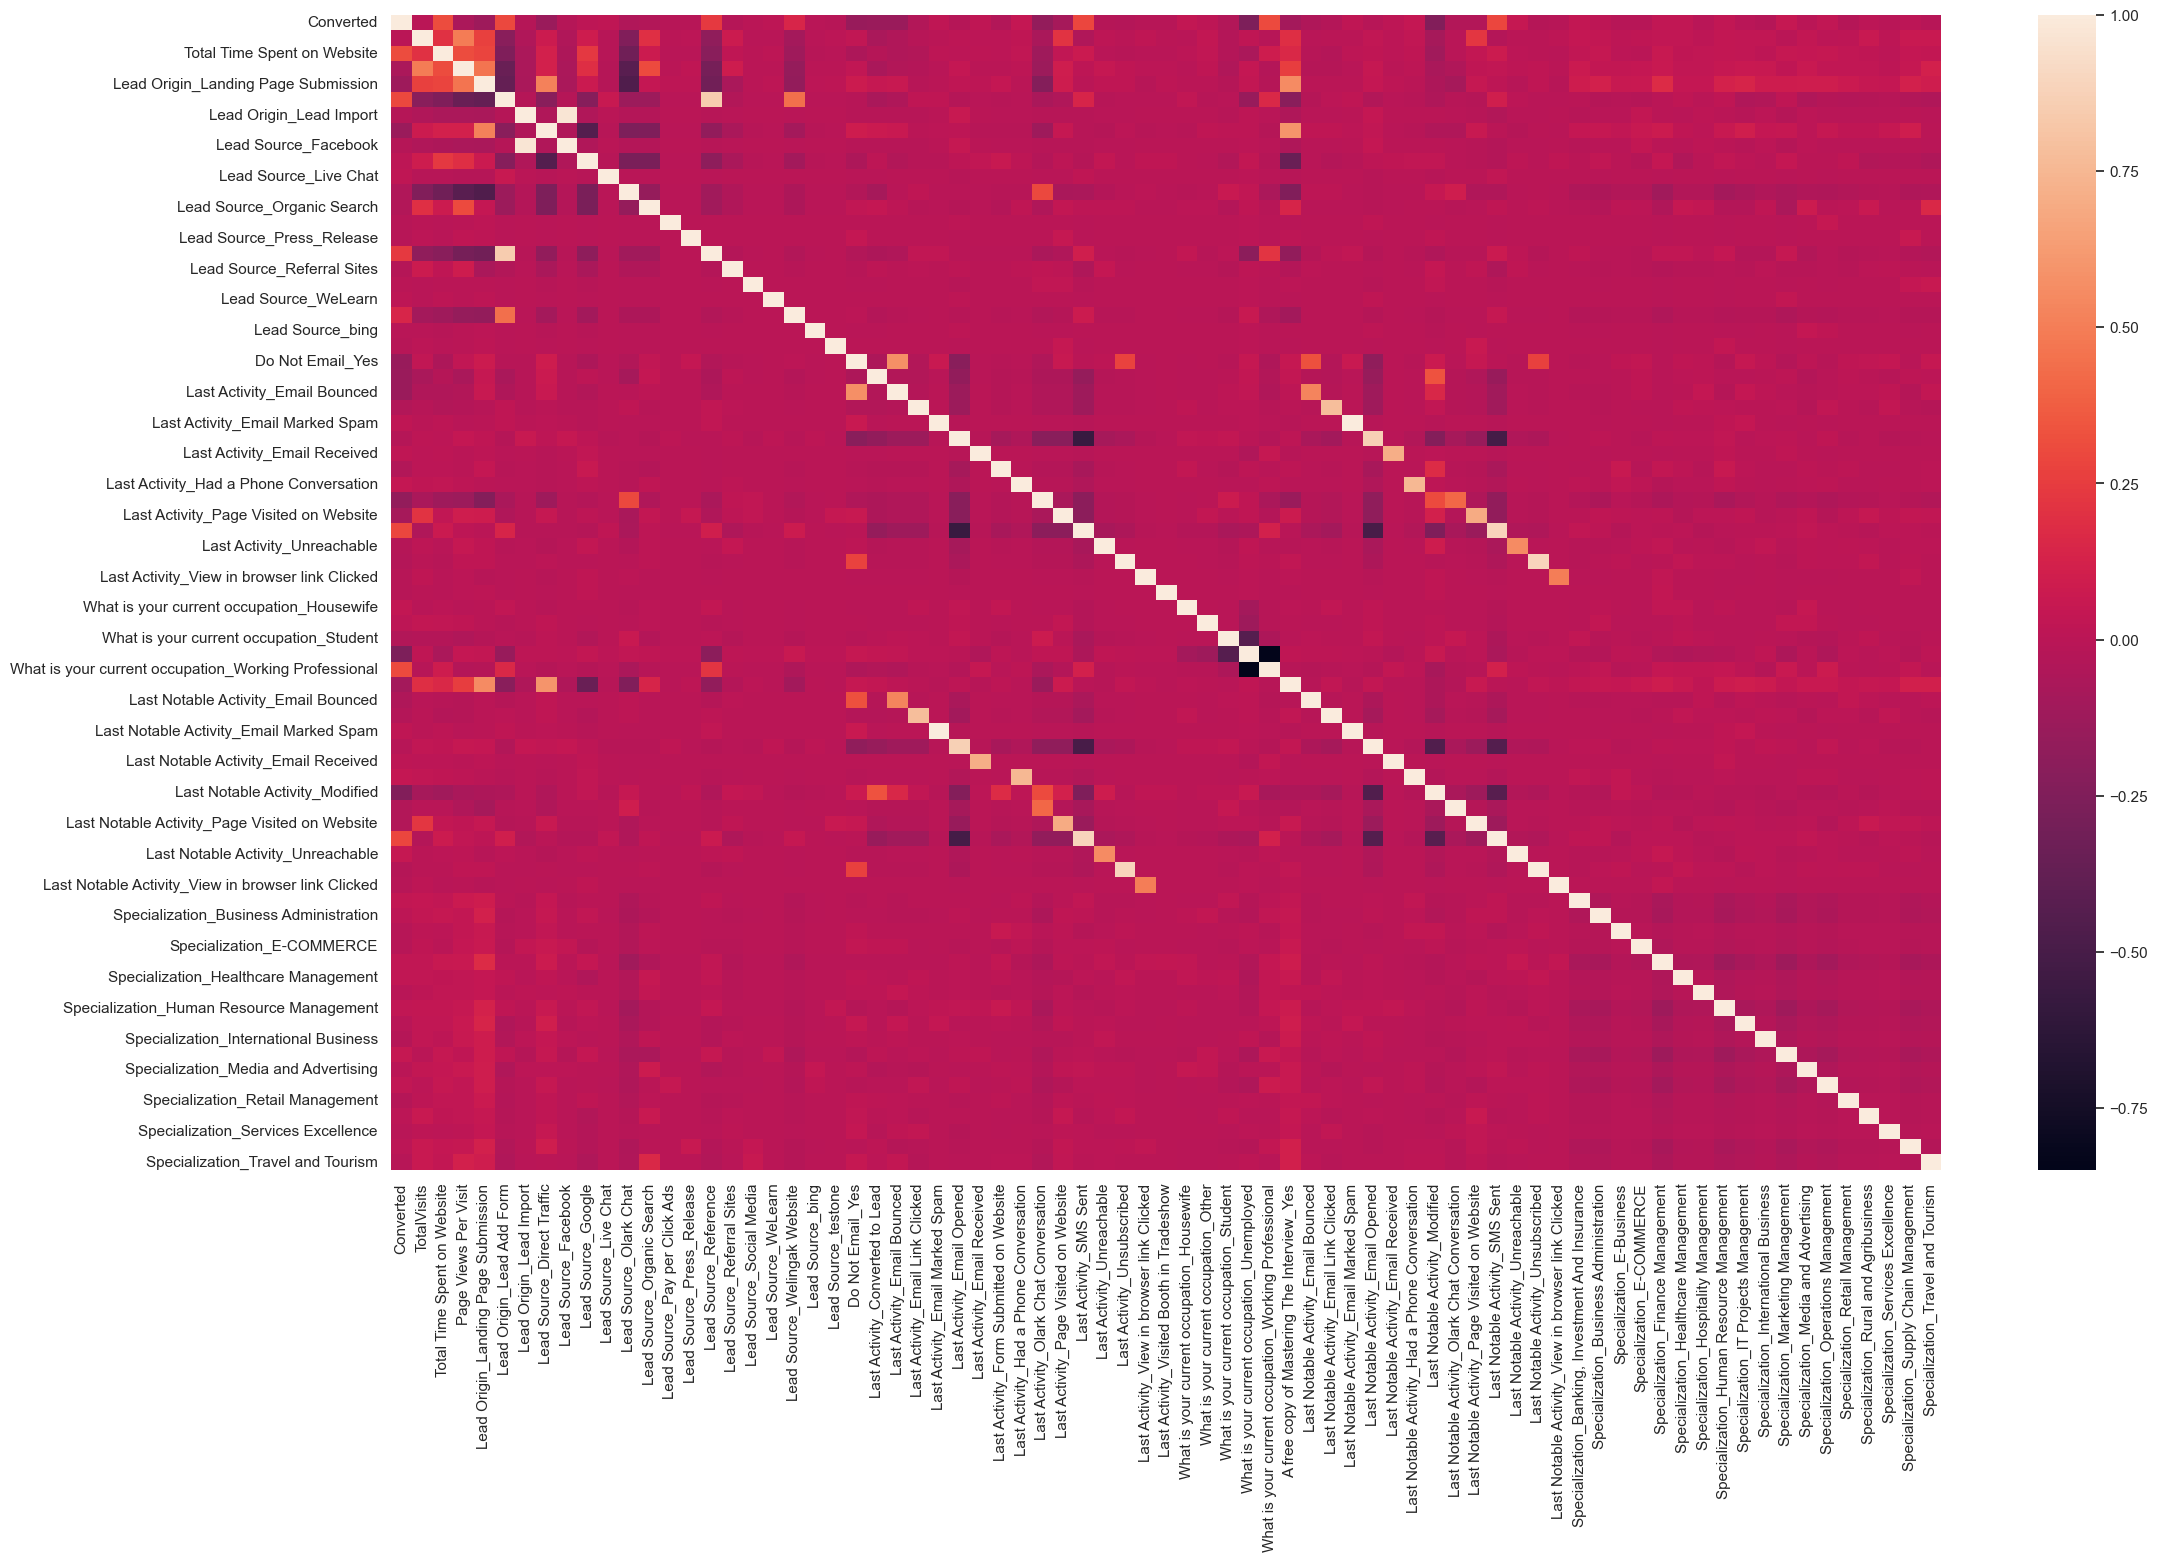

In [426]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

# Step 2 Model Building

In [427]:
#Importing "Logistic regression" and creating a Logistic regression object

In [428]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)   #running RFE with 15 variables as the output
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [429]:
# Checking the features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', False, 57),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_testone', False, 36),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 10),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clic

In [430]:
# Putting the columns selected by RFE id variable cols

cols = X_train.columns[rfe.support_]

In [431]:
# Selecting only the columns selected by RFE

X_train = X_train[cols]

# Model 1

In [432]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4481
Model:                            GLM   Df Residuals:                     4465
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.3
Date:                Sun, 16 Jul 2023   Deviance:                       4084.6
Time:                        17:23:28   Pearson chi2:                 4.71e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0466      0.210     -9.725      0.000      -2.459      -1.634
TotalVisits                                              8.7790      2.480      3.540      0.000       3.919      13.639
Total Time Spent on Website                              4.6630      0.190     24.501      0.000       4.290       5.036
Lead Origin_Lead Add Form                                3.9954      0.233     17.181      0.000       3.540       4.451
Lead Source_Olark Chat                                   1.6552      0.125     13.220      0.000       1.410       1.901
Lead Source_Welingak Website                             2.3891      1.030      2.319      0.020       0.370       4.409
Do Not Email_Yes                                        -1.3120      0.209     -6.268      0.000      -1.722      -0.902
Last Activity_Email Bounced                             -2.0290      0.702     -2.889      0.004      -3.405      -0.653
Last Activity_Had a Phone Conversation                   0.7284      0.859      0.848      0.396      -0.955       2.412
Last Activity_Olark Chat Conversation                   -1.1168      0.183     -6.092      0.000      -1.476      -0.757
Last Activity_SMS Sent                                   1.0806      0.084     12.828      0.000       0.916       1.246
What is your current occupation_Unemployed              -0.2536      0.198     -1.278      0.201      -0.642       0.135
What is your current occupation_Working Professional     2.2995      0.268      8.592      0.000       1.775       2.824
Last Notable Activity_Email Bounced                      2.4930      0.845      2.949      0.003       0.836       4.150
Last Notable Activity_Had a Phone Conversation          22.3479   1.18e+04      0.002      0.998   -2.31e+04    2.31e+04
Last Notable Activity_Unreachable                        3.3078      1.074      3.079      0.002       1.202       5.413
========================================================================================================================
"""

# Checking VIF

In [433]:
# Making a VIF dataframe


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.56
1,Total Time Spent on Website,2.29
7,Last Activity_Had a Phone Conversation,2.12
13,Last Notable Activity_Had a Phone Conversation,2.11
6,Last Activity_Email Bounced,1.94
9,Last Activity_SMS Sent,1.70
2,Lead Origin_Lead Add Form,1.64
5,Do Not Email_Yes,1.61
0,TotalVisits,1.59
11,What is your current occupation_Working Professional,1.53


# Model 2

In [434]:
#Refitting the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4481
Model:                            GLM   Df Residuals:                     4465
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.3
Date:                Sun, 16 Jul 2023   Deviance:                       4084.6
Time:                        17:23:28   Pearson chi2:                 4.71e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0466      0.210     -9.725      0.000      -2.459      -1.634
TotalVisits                                              8.7790      2.480      3.540      0.000       3.919      13.639
Total Time Spent on Website                              4.6630      0.190     24.501      0.000       4.290       5.036
Lead Origin_Lead Add Form                                3.9954      0.233     17.181      0.000       3.540       4.451
Lead Source_Olark Chat                                   1.6552      0.125     13.220      0.000       1.410       1.901
Lead Source_Welingak Website                             2.3891      1.030      2.319      0.020       0.370       4.409
Do Not Email_Yes                                        -1.3120      0.209     -6.268      0.000      -1.722      -0.902
Last Activity_Email Bounced                             -2.0290      0.702     -2.889      0.004      -3.405      -0.653
Last Activity_Had a Phone Conversation                   0.7284      0.859      0.848      0.396      -0.955       2.412
Last Activity_Olark Chat Conversation                   -1.1168      0.183     -6.092      0.000      -1.476      -0.757
Last Activity_SMS Sent                                   1.0806      0.084     12.828      0.000       0.916       1.246
What is your current occupation_Unemployed              -0.2536      0.198     -1.278      0.201      -0.642       0.135
What is your current occupation_Working Professional     2.2995      0.268      8.592      0.000       1.775       2.824
Last Notable Activity_Email Bounced                      2.4930      0.845      2.949      0.003       0.836       4.150
Last Notable Activity_Had a Phone Conversation          22.3479   1.18e+04      0.002      0.998   -2.31e+04    2.31e+04
Last Notable Activity_Unreachable                        3.3078      1.074      3.079      0.002       1.202       5.413
========================================================================================================================
"""

# Checking VIF

In [435]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.56
1,Total Time Spent on Website,2.29
7,Last Activity_Had a Phone Conversation,2.12
13,Last Notable Activity_Had a Phone Conversation,2.11
6,Last Activity_Email Bounced,1.94
9,Last Activity_SMS Sent,1.70
2,Lead Origin_Lead Add Form,1.64
5,Do Not Email_Yes,1.61
0,TotalVisits,1.59
11,What is your current occupation_Working Professional,1.53


We See the VIF values are less than 5.

We will drop theone's having high p-values; beginning with Last Notable Activity_Had a Phone Converstaion.

In [436]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

# Model 3

In [437]:
#Refitting the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4481
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.1
Date:                Sun, 16 Jul 2023   Deviance:                       4092.2
Time:                        17:23:28   Pearson chi2:                 4.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3763
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0462      0.210     -9.725      0.000      -2.459      -1.634
TotalVisits                                              8.9516      2.487      3.600      0.000       4.078      13.825
Total Time Spent on Website                              4.6519      0.190     24.467      0.000       4.279       5.025
Lead Origin_Lead Add Form                                3.9923      0.233     17.163      0.000       3.536       4.448
Lead Source_Olark Chat                                   1.6547      0.125     13.216      0.000       1.409       1.900
Lead Source_Welingak Website                             2.3920      1.030      2.321      0.020       0.372       4.412
Do Not Email_Yes                                        -1.3131      0.209     -6.275      0.000      -1.723      -0.903
Last Activity_Email Bounced                             -2.0252      0.702     -2.885      0.004      -3.401      -0.649
Last Activity_Had a Phone Conversation                   2.2950      0.693      3.313      0.001       0.937       3.653
Last Activity_Olark Chat Conversation                   -1.1164      0.183     -6.091      0.000      -1.476      -0.757
Last Activity_SMS Sent                                   1.0805      0.084     12.832      0.000       0.916       1.246
What is your current occupation_Unemployed              -0.2536      0.198     -1.279      0.201      -0.642       0.135
What is your current occupation_Working Professional     2.2973      0.268      8.586      0.000       1.773       2.822
Last Notable Activity_Email Bounced                      2.4902      0.845      2.947      0.003       0.834       4.147
Last Notable Activity_Unreachable                        3.3070      1.074      3.079      0.002       1.202       5.412
========================================================================================================================
"""

Dropping "What is your current occupation_Working Professional" as it has a high p-value

In [438]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

# Model 4

In [439]:
#Refitting the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4481
Model:                            GLM   Df Residuals:                     4467
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.9
Date:                Sun, 16 Jul 2023   Deviance:                       4173.9
Time:                        17:23:28   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3648
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7016      0.138     -5.074      0.000      -0.973      -0.431
TotalVisits                                    8.8873      2.471      3.596      0.000       4.043      13.731
Total Time Spent on Website                    4.6744      0.189     24.788      0.000       4.305       5.044
Lead Origin_Lead Add Form                      3.9943      0.231     17.273      0.000       3.541       4.448
Lead Source_Olark Chat                         1.6058      0.124     12.948      0.000       1.363       1.849
Lead Source_Welingak Website                   2.3789      1.030      2.309      0.021       0.359       4.398
Do Not Email_Yes                              -1.2831      0.204     -6.295      0.000      -1.683      -0.884
Last Activity_Email Bounced                   -1.9750      0.669     -2.951      0.003      -3.287      -0.663
Last Activity_Had a Phone Conversation         2.3297      0.688      3.386      0.001       0.981       3.678
Last Activity_Olark Chat Conversation         -1.1939      0.183     -6.518      0.000      -1.553      -0.835
Last Activity_SMS Sent                         1.1228      0.083     13.483      0.000       0.960       1.286
What is your current occupation_Unemployed    -1.6070      0.123    -13.052      0.000      -1.848      -1.366
Last Notable Activity_Email Bounced            2.3596      0.817      2.889      0.004       0.759       3.960
Last Notable Activity_Unreachable              3.3702      1.069      3.153      0.002       1.275       5.465
==============================================================================================================
"""

# Checking Final VIF

In [440]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.78
1,Total Time Spent on Website,1.94
6,Last Activity_Email Bounced,1.94
5,Do Not Email_Yes,1.61
9,Last Activity_SMS Sent,1.61
0,TotalVisits,1.53
2,Lead Origin_Lead Add Form,1.43
11,Last Notable Activity_Email Bounced,1.42
3,Lead Source_Olark Chat,1.41
4,Lead Source_Welingak Website,1.29


# Step 3 Model Evaluation

In [441]:
#Using "predict" to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1747    0.883781
6936    0.148285
4533    0.725367
5879    0.108830
1329    0.656537
4997    0.783930
6938    0.284155
5797    0.988057
3641    0.813746
494     0.927104
dtype: float64

In [442]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88378129, 0.14828497, 0.72536653, 0.10883   , 0.65653713,
       0.78392993, 0.28415533, 0.98805671, 0.81374605, 0.92710426])

# Creating a dataframe with actual conversion flag and predicted probabilities

In [443]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.883781
1,0,0.148285
2,0,0.725367
3,0,0.108830
4,1,0.656537


In [444]:
# Creating a new column predicted

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.883781,1
1,0,0.148285,0
2,0,0.725367,1
3,0,0.108830,0
4,1,0.656537,1


# Creating Confusion matrix

In [445]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1906  407]
 [ 549 1619]]


In [446]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7866547645614819


In [447]:
# Evaluating other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [448]:
# Calculating Sensitivity

TP/(TP+FN)

0.7467712177121771

In [449]:
# Calculating the 'specificity'

TN/(TN+FP)

0.824038045827929

# Finding the Optimal cutoff

In [450]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [451]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

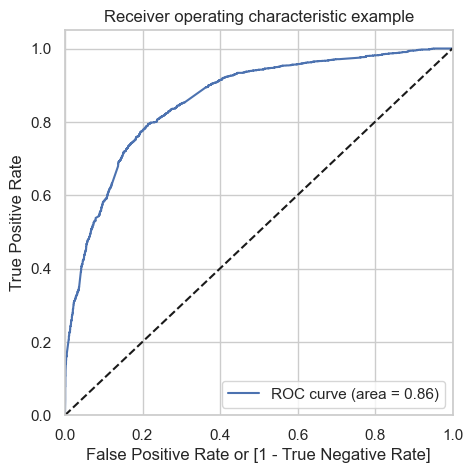

In [452]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve i.e. ROC curve area = 0.86 which is quite good

In [453]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.883781,1,1,1,1,1,1,1,1,1,1,0
1,0,0.148285,0,1,1,0,0,0,0,0,0,0,0
2,0,0.725367,1,1,1,1,1,1,1,1,1,0,0
3,0,0.108830,0,1,1,0,0,0,0,0,0,0,0
4,1,0.656537,1,1,1,1,1,1,1,1,0,0,0


In [454]:
# Creating dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.483821  1.000000  0.000000
0.1   0.1  0.538050  0.993542  0.111111
0.2   0.2  0.713457  0.942343  0.498919
0.3   0.3  0.753626  0.909133  0.607869
0.4   0.4  0.781076  0.813653  0.750540
0.5   0.5  0.786655  0.746771  0.824038
0.6   0.6  0.774604  0.680351  0.862949
0.7   0.7  0.737559  0.554428  0.909209
0.8   0.8  0.704530  0.444188  0.948552
0.9   0.9  0.637358  0.269834  0.981842


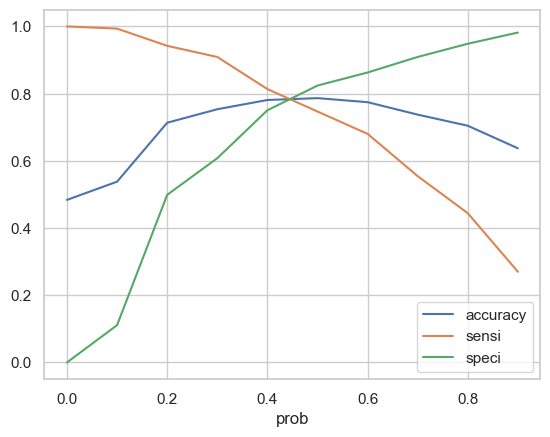

In [455]:
# Creating a plot


cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We can see the intersection happening at a value of 0.42, hence let us choose this value as the cutoff

In [456]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.883781,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.148285,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.725367,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.108830,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.656537,1,1,1,1,1,1,1,1,0,0,0,1


In [457]:
# Checking the accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7817451461727293

In [458]:
# We will create the confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1765,  548],
       [ 430, 1738]])

In [459]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [460]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.801660516605166

In [461]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7630782533506268

# Making predictions on the Test Set

In [462]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [463]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3945,0.000000,0.000000,1,0,0,1,0,0,0,1,1,0,0,0,0
7853,0.039841,0.631602,0,0,0,0,0,0,0,0,0,1,0,0,0
4026,0.011952,0.074824,0,0,0,1,0,0,0,1,1,0,0,0,0
9177,0.007968,0.023768,0,0,0,0,0,0,0,0,0,0,0,0,0
2065,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0


In [464]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])

In [465]:
# Checking X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3945,1.0,0.000000,0.000000,1,0,0,1,0,0,0,1,1,0,0,0,0
7853,1.0,0.039841,0.631602,0,0,0,0,0,0,0,0,0,1,0,0,0
4026,1.0,0.011952,0.074824,0,0,0,1,0,0,0,1,1,0,0,0,0
9177,1.0,0.007968,0.023768,0,0,0,0,0,0,0,0,0,0,0,0,0
2065,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,1.0,0.015936,0.190141,0,0,0,0,0,0,0,0,0,0,0,0,0
6714,1.0,0.011952,0.353433,0,0,0,0,0,0,0,1,1,0,0,0,0
7035,1.0,0.011952,0.068662,0,0,0,1,0,0,0,1,1,0,0,0,0
3833,1.0,0.015936,0.131162,0,0,0,0,0,0,0,1,1,0,0,0,0


In [466]:
# Dropping the required columns from X_test as well

X_test.drop(['What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [467]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [468]:
y_test_pred[:10]

3945    0.821334
7853    0.931174
4026    0.117854
9177    0.372934
2065    0.843660
8209    0.309110
5996    0.168272
3053    0.232423
2100    0.331201
2006    0.077119
dtype: float64

In [469]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [470]:
y_pred_1.head()

,0
3945,0.821334
7853,0.931174
4026,0.117854
9177,0.372934
2065,0.843660


In [471]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [472]:
# Removing the index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [473]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [474]:
y_pred_final.head()

,Converted,0
0,1,0.821334
1,1,0.931174
2,1,0.117854
3,0,0.372934
4,0,0.843660


In [475]:
# Renaming the  column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [476]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.821334
1,1,0.931174
2,1,0.117854
3,0,0.372934
4,0,0.843660


In [477]:
# Making predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [478]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.821334,1
1,1,0.931174,1
2,1,0.117854,0
3,0,0.372934,0
4,0,0.843660,1


In [479]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7756376887038001

In [480]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[773, 225],
       [206, 717]])

In [481]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [482]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7768147345612134

In [483]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7745490981963928

# Precision Call Review

In [484]:
#heconfusionmatrixagain

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1906,  407],
       [ 549, 1619]])

Precision = TP/TP+FP

In [485]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.799111549851925

Recall = TP/TP+FN

In [486]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7467712177121771

# Precision and Recall TradeOff

In [487]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 4476    1
 4477    0
 4478    0
 4479    1
 4480    0
 Name: Converted, Length: 4481, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 4476    0
 4477    1
 4478    0
 4479    1
 4480    0
 Name: Predicted, Length: 4481, dtype: int64)

In [488]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


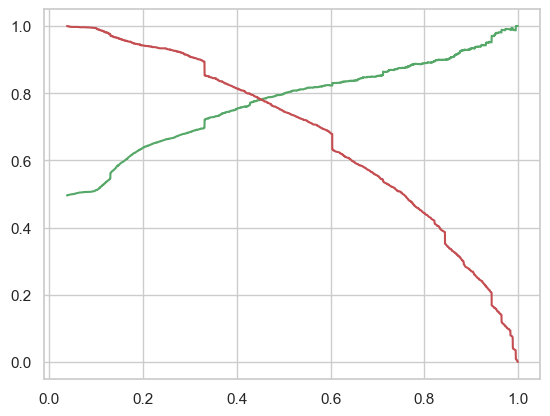

In [489]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [490]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.883781,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.148285,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.725367,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.108830,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.656537,1,1,1,1,1,1,1,1,0,0,0,1


In [491]:
#Checking the `accuracy`

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7882169158669939

In [492]:
# Creating the confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1820,  493],
       [ 456, 1712]])

In [493]:
# Evaluating the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Precision

In [494]:
TP/(TP+FP)

0.7764172335600907

# Recall

In [495]:
TP/(TP+FN)

0.7896678966789668

# Step 5: Making Predictions on the Test Set

In [496]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [497]:
y_test_pred[:10]

3945    0.821334
7853    0.931174
4026    0.117854
9177    0.372934
2065    0.843660
8209    0.309110
5996    0.168272
3053    0.232423
2100    0.331201
2006    0.077119
dtype: float64

In [498]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [499]:
y_pred_1.head()

,0
3945,0.821334
7853,0.931174
4026,0.117854
9177,0.372934
2065,0.843660


In [500]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [501]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [502]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [503]:
y_pred_final.head()

,Converted,0
0,1,0.821334
1,1,0.931174
2,1,0.117854
3,0,0.372934
4,0,0.843660


In [504]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [505]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.821334
1,1,0.931174
2,1,0.117854
3,0,0.372934
4,0,0.843660


In [506]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)


In [507]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.821334,1
1,1,0.931174,1
2,1,0.117854,0
3,0,0.372934,0
4,0,0.843660,1


In [508]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7766788131181677

In [509]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[792, 206],
       [223, 700]])

In [510]:
# Calculating the Precision

TP/(TP+FP)

0.7764172335600907

In [511]:
# Calculating the Recall

TP/(TP+FN)

0.7896678966789668

# Conclusion

It was found that the variables that mattered the most in potential buyers are:
Total Visits
Total Time Spent on the Website
Lead Score is also a notable feature that should be focused on

The below 3 categorical variables should be focused on the most to increase the probability of lead conversions:
Lead Origin_Lead Add Form
Lead Source_Olark Chat
Last Activity_Had a Phone Conversation

Most of the leads joined course for their better career path and majority of them are from Finance Management background.

One thing that can convert the leads to HOT LEADS is through repetitive calls and email enagagement.

Almost all of the leads current occupation is unemployes, hence more focus should be given to unemployed leads.